***
<h1 style="background-color:lightgreen;font-family:newtimeroman;text-align:center;border-radius: 0px 50px">
    <font color=black size=7>
        Análise - Campeonato Brasileiro
    </font>
</h1>

<p>Observação: Em desenvolvimento</p>

***

## Bibliotecas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Bases de Dados

In [62]:
df = pd.read_csv("//Users/felipebarreto/Desktop/Projetos Pessoais/Brasileirão/campeonato-brasileiro-estatisticas-full.csv", sep=";")
times = pd.read_csv("//Users/felipebarreto/Desktop/Projetos Pessoais/Brasileirão/campeonato-brasileiro-full.csv", sep=";")
estados = pd.read_csv("//Users/felipebarreto/Desktop/Projetos Pessoais/Brasileirão/estados.csv", sep=';', encoding='latin-1')
estados.columns = ['estado','uf','regiao']

display(
    df.head(3),
    df.info(3)
)
print("\n\n")
display(
    times.head(3),
    times.info(3)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4806 non-null   int64  
 1   Mandante           4806 non-null   int64  
 2   Chutes             4754 non-null   float64
 3   Chutes a gol       4754 non-null   float64
 4   Posse de bola      4754 non-null   object 
 5   Passes             4754 non-null   float64
 6   Precisão de passe  2478 non-null   object 
 7   Faltas             4754 non-null   float64
 8   Cartões amarelos   4754 non-null   float64
 9   Cartões vermelhos  4754 non-null   float64
 10  Impedimentos       4754 non-null   float64
 11  Escanteios         4754 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 450.7+ KB


,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,6041,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0
1,6041,0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6040,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0


None




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8440 entries, 0 to 8439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8440 non-null   int64  
 1   Rodada            8440 non-null   object 
 2   Data              8436 non-null   object 
 3   Horário           8079 non-null   object 
 4   Dia               8436 non-null   object 
 5   Mandante          8440 non-null   object 
 6   Visitante         8440 non-null   object 
 7   Vencedor          8440 non-null   object 
 8   Arena             8436 non-null   object 
 9   Mandante Placar   8436 non-null   float64
 10  Visitante Placar  8436 non-null   float64
 11  Estado Mandante   8440 non-null   object 
 12  Estado Visitante  8440 non-null   object 
 13  Estado Vencedor   8440 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 923.2+ KB


,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2.0,0.0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0.0,2.0,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4.0,1.0,ES,SP,ES


None

In [68]:
estados.head(3)

,estado,uf,regiao
0,Acre,AC,Norte
1,Alagoas,AL,Nordeste
2,Amap,AP,Norte


In [63]:
## Algumas funções necessárias ##

# transformar string em datetime
def to_time(df, col):
    df[col] = pd.to_datetime(df[col])

# transformação de uma variável em um inteiro
def to_int (df, col):
    df[col] = df[col].str.astype(int)

def str_to_float (df, col):
    df[col] = df[col].str.replace('%', '').astype(float)

# plot dos valores faltantes
def missing_map(df, size_x, size_y, color = 'Reds'):
    plt.figure(figsize=(size_x,size_y))
    plt.title('Valores Faltantes', fontweight = 'bold', fontsize = 15)
    ax = sns.heatmap(df.isna().sum().to_frame(), annot = True, fmt = 'd', cmap = color)
    ax.set_ylabel("Variáveis", fontsize=12)
    ax.set_xlabel('Quantidade Faltante', fontsize=12)

# função para transformar as observações em minúsculas
def to_lower(df, col):
    df[col] = df[col].str.lower()


In [64]:
## Ajustes nos datasets ##

# Algumas transformações necessárias
to_time(times, 'Data')
times.Mandante = times.Mandante.replace('athletico-pr','athlético-pr')
times.Visitante = times.Visitante.replace('athletico-pr','athlético-pr')

# colocando para minúsculas (ajuda nas duplicidades)
for i in ['Dia', 'Mandante', 'Visitante','Vencedor', 'Arena','Estado Mandante', 'Estado Visitante', 'Estado Vencedor']:
    to_lower(times, i)

# renomeando as colunas do dataset
rename_df = {
     'ID': 'id', 
     'Mandante': 'mandante',
     'Chutes': 'chutes', 
     'Chutes a gol': 'chutes_gol', 
     'Posse de bola': 'posse_bola', 
     'Passes': 'passes',
     'Precisão de passe': 'precisao_passes', 
     'Faltas': 'faltas', 
     'Cartões amarelos': 'cartoes_amarelos', 
     'Cartões vermelhos': 'cartoes_vermelhos',
     'Impedimentos': 'impedimentos', 
     'Escanteios': 'escanteios' 
}
df = df.rename(columns = rename_df)

rename_times = {
    'ID': 'id',
    'Rodada': 'rodada',
    'Data': 'data',
    'Horário':'horario',
    'Dia':'dia',
    'Mandante':'mandante',
    'Visitante':'visitante',
    'Vencedor':'vencedor',
    'Arena':'arena',
    'Mandante Placar':'mandante_placar',
    'Visitante Placar':'visitante_placar',
    'Estado Mandante':'estado_mandante',
    'Estado Visitante':'estado_visitante',
    'Estado Vencedor': 'estado_vencedor'
    }
times = times.rename(columns = rename_times)

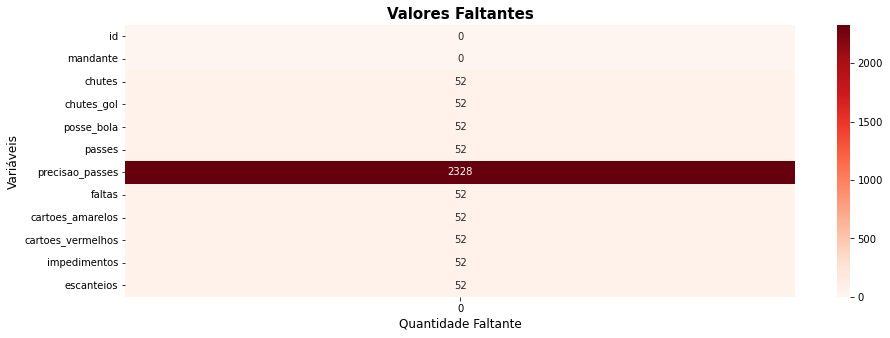

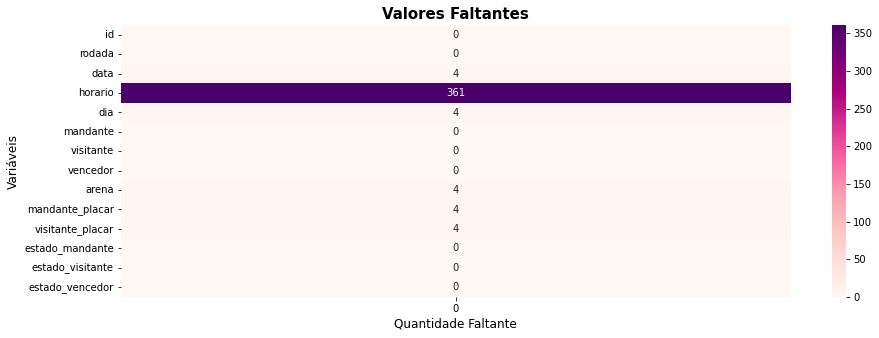

In [65]:
# verificando valores faltantes
missing_map(df, 15, 5)
missing_map(times, 15, 5, color="RdPu") 

In [66]:
times_todos = np.unique(
    np.concatenate([times.mandante.unique(), 
                    times.visitante.unique()]))

sorted(times_todos)

['américa-mg',
 'américa-rn',
 'athlético-pr',
 'atlético-go',
 'atlético-mg',
 'avaí',
 'bahia',
 'barueri',
 'botafogo-rj',
 'botafogo-sp',
 'bragantino',
 'brasiliense',
 'ceará',
 'chapecoense',
 'corinthians',
 'coritiba',
 'criciúma',
 'cruzeiro',
 'csa',
 'cuiabá',
 'figueirense',
 'flamengo',
 'fluminense',
 'fortaleza',
 'gama',
 'goiás',
 'grêmio',
 'grêmio prudente',
 'guarani',
 'internacional',
 'ipatinga',
 'joinville',
 'juventude',
 'malutrom',
 'náutico',
 'palmeiras',
 'paraná',
 'paysandu',
 'ponte preta',
 'portuguesa',
 'remo',
 'santa cruz',
 'santo andré',
 'santos',
 'sport',
 'são caetano',
 'são paulo',
 'vasco',
 'vitória']

In [70]:
estados_todos = estados.uf.str.lower()

sorted(estados_todos)

['ac',
 'al',
 'am',
 'ap',
 'ba',
 'ce',
 'df',
 'es',
 'go',
 'ma',
 'mg',
 'ms',
 'mt',
 'pa',
 'pb',
 'pe',
 'pi',
 'pr',
 'rj',
 'rn',
 'ro',
 'rr',
 'rs',
 'sc',
 'se',
 'sp',
 'to']

In [20]:
display(df.head(3), times.head(3))

,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,6041,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0
1,6041,0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6040,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0


,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,sábado,fluminense,bahia,fluminense,maracanã,2.0,0.0,rj,ba,rj
1,2,1,2000-07-29,16h00,sábado,vasco,sport,sport,são januário,0.0,2.0,rj,pe,pe
2,3,1,2000-07-29,16h00,sábado,vitória,palmeiras,vitória,barradão,4.0,1.0,es,sp,es


## Criando uma função para ver as estatísticas

In [ ]:
def stats_team(time_escolhido, UF):
    rename = {
    'Rodada': 'rodada',
    'Data': 'data',
    'Horário':'horario',
    'Dia':'dia',
    'Mandante':'mandante',
    'Visitante':'visitante',
    'Vencedor':'vencedor',
    'Arena':'arena',
    'Mandante Placar':'mandante_placar',
    'Visitante Placar':'visitante_placar',
    'Estado Mandante':'estado_mandante',
    'Estado Visitante':'estado_visitante',
    'Estado Vencedor': 'estado_vencedor'
    }

    time = times.rename(columns = rename)
    time = time[time.data.dt.year > 2002] # Só a partir de 2002 (pontos corridos)
    time = time[(times['Mandante'] == time_escolhido) | (times['Visitante'] == time_escolhido)]
    
    ganhou = time[time.vencedor == time_escolhido]
    total_temporadas = len(times[pd.to_datetime(times.Data).dt.year > 2002].Data.dt.year.unique() - 1)
    total_temporadas_time = len(time.data.dt.year.unique() - 1)

    print("\n\n>>>   Algumas estatísticas sobre o time {}   <<<\n\n"
        "- Número de vitórias do time nas temporadas: {}\n"\
        "- Percentual de vitórias por temporada: {}%\n\n"\
        "- Número de empates do time nas temporadas: {}\n"\
        "- Percentual de empates por temporada: {}%\n\n"\
        "- Número de derrotas do time nas temporadas: {}\n"\
        "- Percentual de derrotas por temporada: {}%\n\n"\
        "- Temporadas dem que o time ficou na 1º divisão: {}\n"\
        "- De {} temporadas da Série A, participou de {} temporadas. Ou seja, de {}%\n\n"\
        .format(pd.Series([time_escolhido]).str.title()[0],
                time[time['estado_vencedor'] == UF].ID.count(),
                round((100 * time[time['estado_vencedor'] == UF].ID.count() / time.ID.count()), 2),
                time[(time['estado_vencedor'] == '-')].ID.count(),
                round((100 * time[time['estado_vencedor'] == '-'].ID.count() / time.ID.count()), 2),
                time[(time['estado_vencedor'] != UF) & (time['estado_vencedor'] != '-')].ID.count(),
                round((100 * time[(time['estado_vencedor'] != UF) & (time['estado_vencedor'] != '-')].ID.count() / time.ID.count()), 2),
                ganhou.data.dt.year.unique(),
                total_temporadas, total_temporadas_time, round((100*total_temporadas_time / total_temporadas), 2)
            )
    )

# estatística sobre o time
print(
    "---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n                   "
    "AVALIAÇÃO DO SEU TIME!\n---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n")
time_escolhido = input("\nQual o time que deseja avaliar?\n>> Time: ")
UF = input("\nQual a UF do time escolhido?\n>> UF: ")
print("\n............................................................")
stats_team(time_escolhido, UF)                                      

# looping
continuar = input("---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n\n"
"Deseja ver outro time?\nResposta: ")
while continuar in ("s","sim","S","Sim","yes","Yes","y","Y"):
    time_escolhido = input("\nQual o time que deseja avaliar?\n>> Time: ")
    UF = input("\nQual a UF do time escolhido?\n>> UF: ")
    print("\n---.---.---.---.---.---.---.---.---.---.---.---.---.---.---")
    stats_team(time_escolhido, UF)
    continuar = input("---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n\n"
    "Deseja ver outro time?\n\nResposta: ")

---*---*---*---*---*---*---*---*---*---*---*---*---*---*---
                   AVALIAÇÃO DO SEU TIME!
---*---*---*---*---*---*---*---*---*---*---*---*---*---*---


Qual o time que deseja avaliar?
>> Time: ceará

Qual a UF do time escolhido?
>> UF: ce

............................................................


>>>   Algumas estatísticas sobre o time Ceará   <<<

- Número de vitórias do time nas temporadas: 59
- Percentual de vitórias por temporada: 29.21%

- Número de empates do time nas temporadas: 65
- Percentual de empates por temporada: 32.18%

- Número de derrotas do time nas temporadas: 78
- Percentual de derrotas por temporada: 38.61%

- Temporadas dem que o time ficou na 1º divisão: [2010 2011 2018 2019 2020 2021]
- De 19 temporadas da Série A, participou de 6 temporadas. Ou seja, de 31.58%


---*---*---*---*---*---*---*---*---*---*---*---*---*---*---

Deseja ver outro time?
Resposta: n


### Questionamentos

- O time teve melhor desempenho em casa ou fora de casa?
- Quais as chances de o time ganhar em casa?
- 

In [ ]:
display(
    times.head(),
    df.head()
)

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,sábado,fluminense,bahia,fluminense,maracanã,2.0,0.0,rj,ba,rj
1,2,1,2000-07-29,16h00,sábado,vasco,sport,sport,são januário,0.0,2.0,rj,pe,pe
2,3,1,2000-07-29,16h00,sábado,vitória,palmeiras,vitória,barradão,4.0,1.0,es,sp,es
3,4,1,2000-07-30,17h00,domingo,botafogo-rj,atlético-mg,-,caio martins,0.0,0.0,rj,mg,-
4,5,1,2000-07-30,18h30,domingo,juventude,flamengo,-,alfredo jaconi,1.0,1.0,rs,rj,-


,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,6041,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0
1,6041,0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6040,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0
3,6040,0,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
4,6042,1,26.0,11.0,74%,702.0,NaN,9.0,2.0,0.0,1.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4806 non-null   int64  
 1   Mandante           4806 non-null   int64  
 2   Chutes             4754 non-null   float64
 3   Chutes a gol       4754 non-null   float64
 4   Posse de bola      4754 non-null   object 
 5   Passes             4754 non-null   float64
 6   Precisão de passe  2478 non-null   object 
 7   Faltas             4754 non-null   float64
 8   Cartões amarelos   4754 non-null   float64
 9   Cartões vermelhos  4754 non-null   float64
 10  Impedimentos       4754 non-null   float64
 11  Escanteios         4754 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 450.7+ KB


Index(['ID', 'Mandante', 'Chutes', 'Chutes a gol', 'Posse de bola', 'Passes',
       'Precisão de passe', 'Faltas', 'Cartões amarelos', 'Cartões vermelhos',
       'Impedimentos', 'Escanteios'],
      dtype='object')

In [ ]:
df['Precisão de passe'].value_counts()

82%    208
84%    184
85%    174
81%    169
86%    162
83%    159
80%    154
87%    143
78%    127
79%    123
77%    114
88%    103
75%     90
76%     82
72%     64
89%     63
73%     57
74%     50
71%     41
90%     35
70%     31
69%     28
68%     22
65%     16
91%     14
67%     14
66%     10
62%      8
64%      8
92%      6
61%      5
63%      4
60%      3
57%      2
59%      2
51%      1
56%      1
93%      1
Name: Precisão de passe, dtype: int64